In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
T = np.linspace(0, 2, 300)

In [29]:
a1 = 5
a2 = 4

In [57]:
y_clean = a1 * np.cos(4 * np.pi * T) + a2 * np.sin(6 * np.pi * T)
y = y_clean + np.random.randn(*y_clean.shape)

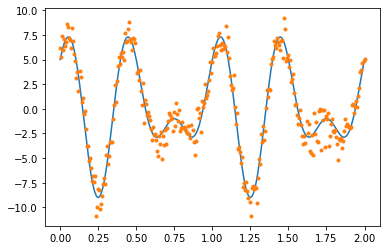

In [58]:
plt.plot(T, y_clean)
plt.plot(T, y, '.')

In [59]:
X = np.vstack((np.ones_like(T), T))
Y = y.reshape(1, -1)

In [60]:
sigma = 0.05
def w(t):
  return np.diag(np.exp(-(t-T)**2 / (2 * sigma**2)))

In [61]:
w(0.5)

array([[1.92874985e-022, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 7.28426281e-022, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 2.70223296e-021, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.09122392e-192, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 2.02574497e-194, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 3.69388307e-196]])

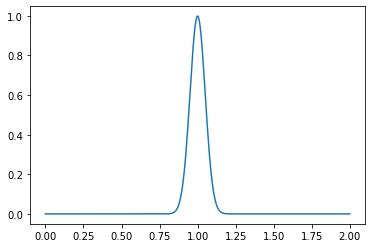

In [62]:
plt.plot(T, np.diag(w(1)))

In [63]:
@np.vectorize
def loess(t):
  A = Y @ w(t) @ X.T @ np.linalg.inv(X @ w(t) @ X.T)
  return A @ np.array([1, t])

In [64]:
y_est = loess(T)

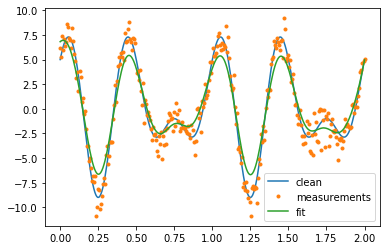

In [67]:
plt.plot(T, y_clean, label="clean")
plt.plot(T, y, '.', label="measurements")
plt.plot(T, y_est, label="fit")
plt.legend()